### Proket Pinguin

<img src='https://img.freepik.com/vektoren-kostenlos/illustrator-von-koerperteilen-des-pinguins_65947-757.jpg?size=626&ext=jpg' width='400px;'/>

Gegeben sind zwei Dateien `penguins_size.csv` und `penguins_lter.csv`. Untersuchen Sie eine von diesen mit Pandas und erstellen Sie, wenn möglich, ein optimales Modell, welches die Zuordnung von Pinguinen anhand ihrer physikalischen Merkmale zu den gegebenen Kategorien beschreiben kann. Exportieren Sie dann das Modell als Datei und überprüfen Sie dann seine Leistung noch einmal.

_(alle Schritte ähnlich wie in `datenanalyse_projekt_schritte.jpnb`)_

Versucht die Modelle mit GridSearch zu erstellen. Sucht euch dabei für jedes Modell ein paar Hyperparameter zum Ausprobieren aus. Stellt sicher, dass CorssValidation verwendet wird.


In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Überprüfen beider Deteien, um eine auszuwählen:

In [247]:
df=pd.read_csv('penguins_size.csv')
df.shape

(344, 7)

In [248]:
df2=pd.read_csv('penguins_lter.csv')

df2.shape


(344, 17)

In [249]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [250]:
#Anzahl fehlender Werte pro Spalte
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [251]:
df = df.dropna(subset=['sex'])

In [252]:
df2.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [253]:
df2.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [254]:
df2['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [255]:
df2['studyName'].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

In [256]:
df2['Sample Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152])

In [257]:
df2['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [258]:
df2['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [259]:
df2['Stage'].unique()#man kann löschen

array(['Adult, 1 Egg Stage'], dtype=object)

In [260]:
df2['Region'].unique()#man kann löschen


array(['Anvers'], dtype=object)

In [261]:
df2['Clutch Completion'].unique()

array(['Yes', 'No'], dtype=object)

In [262]:
df2['Comments'].unique()

array(['Not enough blood for isotopes.', nan, 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

Die erste DataFrame wird gewählt, da sie alle notwendigen Informationen enthält.

In [263]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


Allgemeine Information:

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [265]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [266]:
df.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


Die Klassen der Spalten von df:

In [267]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [268]:
df['island'].unique()


array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [269]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [270]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [271]:
df.groupby('species').size() # Verteilung von Datenexemplaren im Datensatz

species
Adelie       146
Chinstrap     68
Gentoo       120
dtype: int64

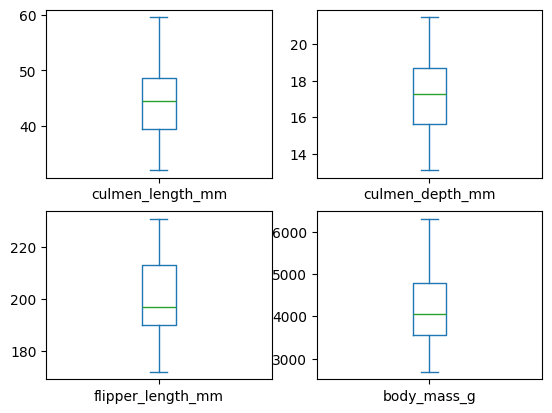

In [272]:
# Visualisierung
df.plot(kind='box',           # welche Art Diagramm (kind)
        subplots=True,        # mehrere Diagramme auf einem Bild
        layout=(2,2),         # Leinwand-Layout: 2 Reihen und 2 Spalten
        sharex=False,         # jedes (Unter-)Diagramm mit eigene x-Achse
        sharey=False          # jedes (Unter-)Diagramm mit eigene y-Achse
       )
plt.show() # Diagramm anzeigen

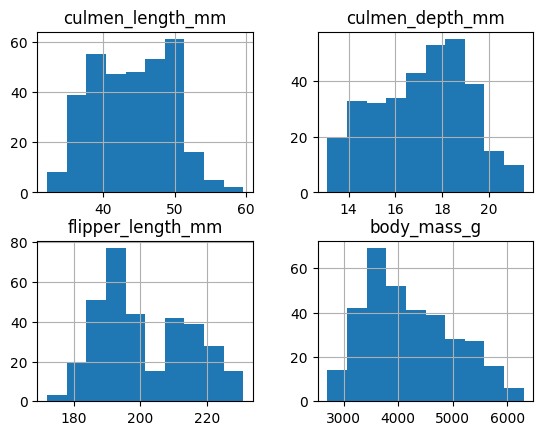

In [273]:
# alternativ: Datenverteilung mit Histogramm
df.hist()
plt.show()

Alle Spalten des DataFrames in numerische Werte umwandeln:

In [274]:
def encoden_and_decoden_vom_column(data, column_name):
    """
    Universelle Funktion zum Kodieren und dekodieren einer Spalte von Dataframe

    """
    l_encoder = LabelEncoder()
    
    # Kodieren der Spalte
    data[column_name] = l_encoder.fit_transform(data[column_name])
    
    # Dekodieren
    decoded_column = l_encoder.inverse_transform(data[column_name])
    
    return data, l_encoder, decoded_column

encoden_and_decoden_vom_column(df, 'sex')
encoden_and_decoden_vom_column(df, 'island')

# Als Target nehme ich Spalte 'species'
target_encoder = LabelEncoder()
df['target'] = target_encoder.fit_transform(df['species'])

# Überprüfen, ob alle nötigen Spalten numerisch sind
print(df.dtypes)



species               object
island                 int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
target                 int64
dtype: object


Text(0.5, 1.0, 'Correlation Matrix')

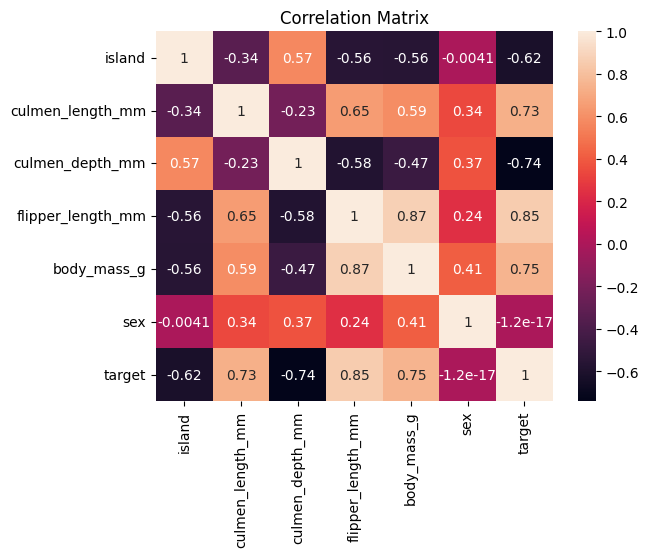

In [275]:
#Correlation
corr_m = df.drop("species", axis=1).corr()
sns.heatmap(corr_m, annot=True)
plt.title('Correlation Matrix')

<Axes: >

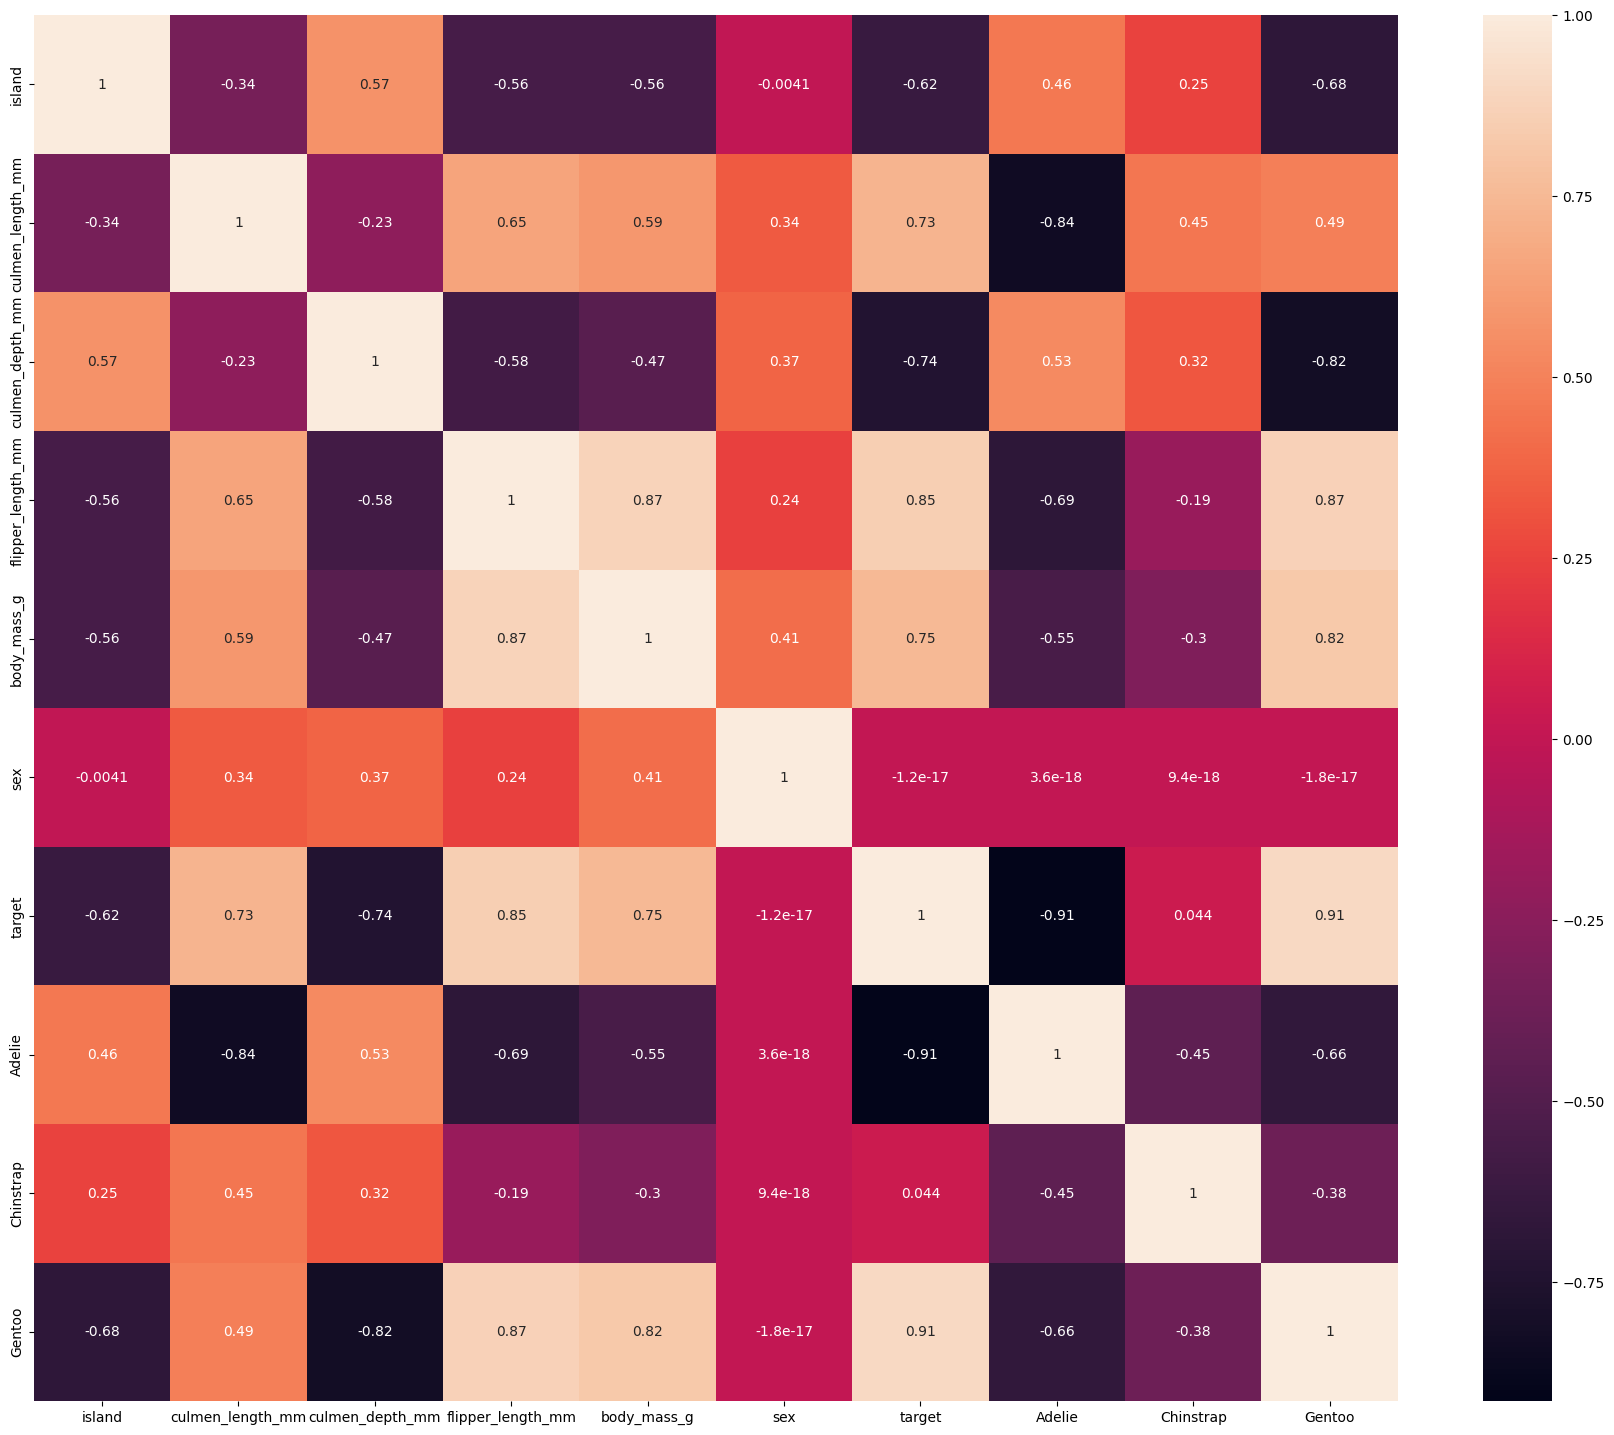

In [276]:
plt.figure(figsize=(22, 18))
klassen = pd.get_dummies(df.species)
df_oneHot = pd.concat([df.drop("species", axis=1), klassen], axis=1)
sns.heatmap(df_oneHot.corr(), annot=True)

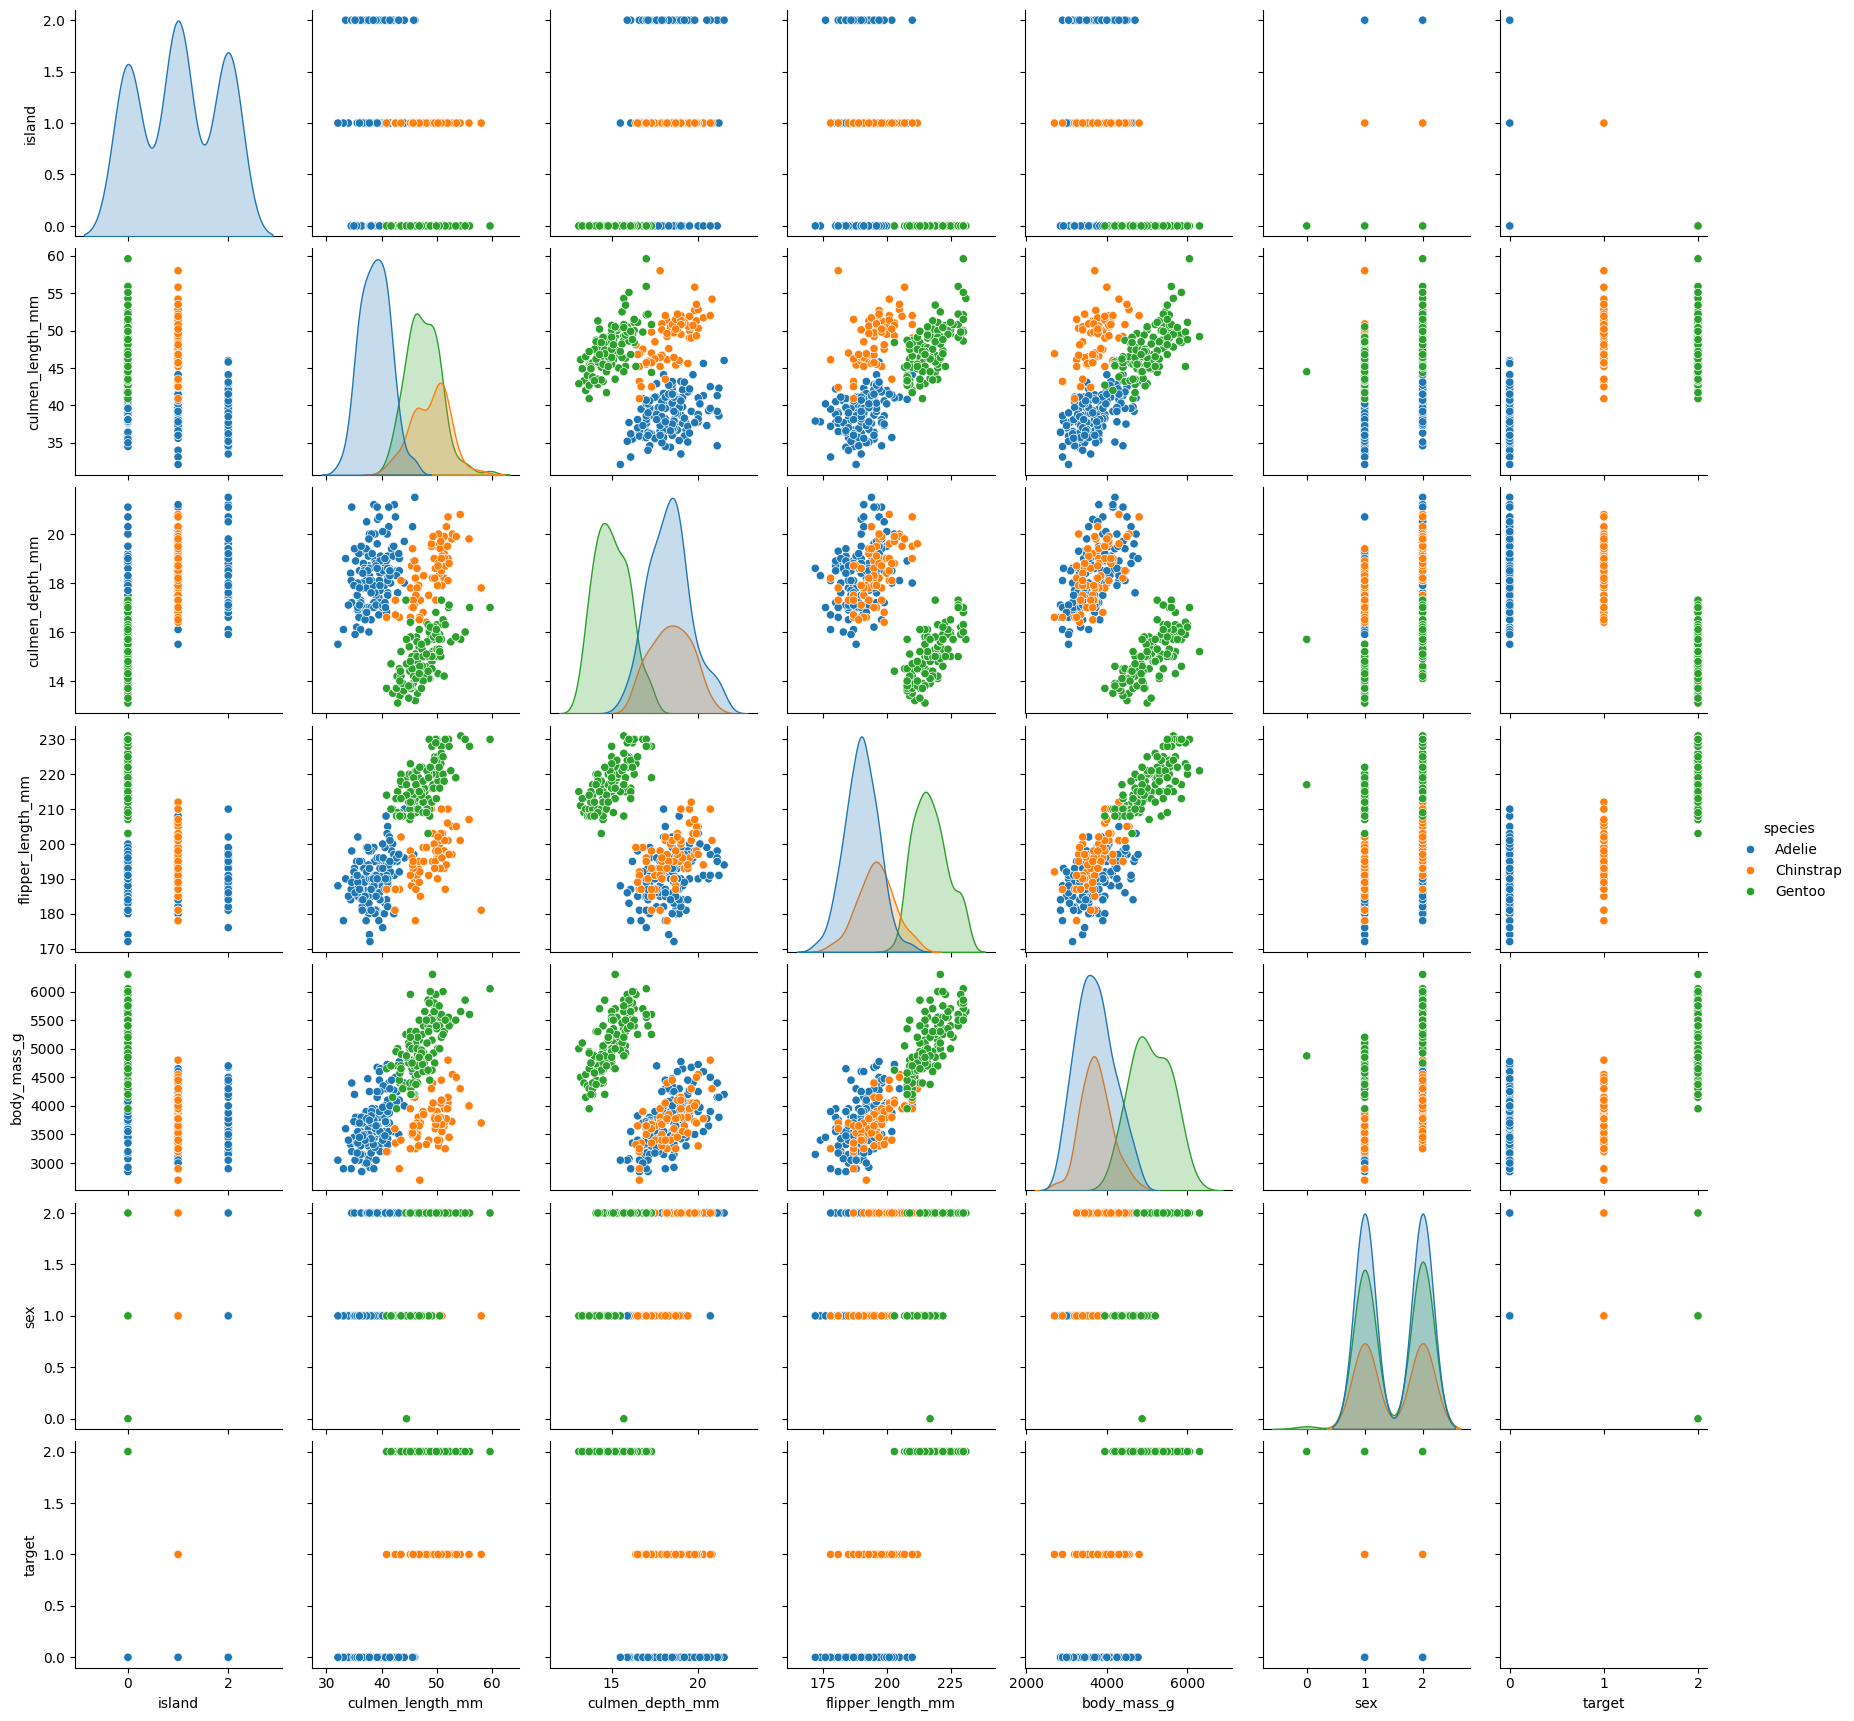

In [277]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show();

In [278]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target
0,Adelie,2,39.1,18.7,181.0,3750.0,2,0
1,Adelie,2,39.5,17.4,186.0,3800.0,1,0
2,Adelie,2,40.3,18.0,195.0,3250.0,1,0


In [279]:
df.dtypes #Species ist ein Objekt, man muss löschen

species               object
island                 int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
target                 int64
dtype: object

In [280]:
df.drop('species', axis=1, inplace=True) 
df.tail(3)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target
341,0,50.4,15.7,222.0,5750.0,2,2
342,0,45.2,14.8,212.0,5200.0,1,2
343,0,49.9,16.1,213.0,5400.0,2,2


Daten zur Erstellung des Modells vorbereiten:

In [281]:
# Features set: eín Dataframe aus Attributen (ohne Target)
X = df.drop("target", axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)


- Logistic Regression
- Decision Tree
- SVC

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [283]:
# Modelle erstellen und in einer Liste speichern
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
print(models)

[('LR', LogisticRegression()), ('DT', DecisionTreeClassifier()), ('SVC', SVC())]


In [284]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# eine Liste für Auswertungsergebnisse für Modelle
results = []
# eine Liste von Namen von Modellen
names = []

# eine Schleife für 3 Modelle
for name, model in models:
    kfold = KFold(n_splits = 5)
    cv_results = cross_val_score(model, 
                                 X_train, 
                                 y_train, 
                                 cv = kfold, 
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(),2)}')

LR: 0.99
DT: 0.96
SVC: 0.72


In [285]:
# Durchschnittwerte von Ergebnissen in einer Liste
res = [round(result.mean(),2)*100 for result in results]
res

[np.float64(99.0), np.float64(96.0), np.float64(72.0)]

In [286]:
modell_names = ['Logistic Reg.', 'Decision Tree', 'SVC'] # Modelle (Algorithmen)

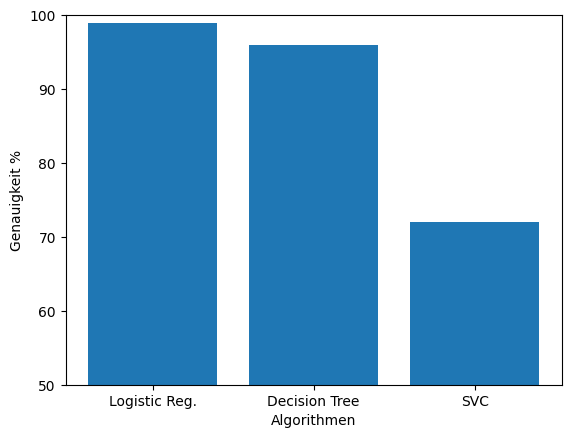

In [290]:
plt.bar(modell_names, res)
plt.xlabel('Algorithmen')
plt.ylabel('Genauigkeit %')
plt.ylim([50, 100])
plt.show()

In [291]:
from sklearn.metrics import classification_report

target_names = target_encoder.inverse_transform([0, 1, 2])

lr = LogisticRegression() # Modell erstellen
lr.fit(X_train, y_train) # Modell anhand Training-Daten trainieren 
y_pred = lr.predict(X_test) # Mit dem trainierten Modell Einschätzungen anhand Test-Daten
report_svc = classification_report(y_test, y_pred, target_names=target_names) # Ein Vergleich zwischen Realität und Einschätzung 
print("LogReg:\n",report_svc)

LogReg:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        31
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Modelle exportieren und teilen:

In [292]:
import joblib

In [293]:
file_name = 'logr_classifier.sav'

In [294]:
# das Modell in einer Datei (file) mit diesem Namen speichern
# joblib.dump(modell, file_name)
joblib.dump(lr, file_name)

['logr_classifier.sav']

In [295]:
# gespeichertes Modell laden
loaded_model = joblib.load(file_name)

In [299]:
mein_p = X.iloc[19]
mein_p

island                  0.0
culmen_length_mm       38.8
culmen_depth_mm        17.2
flipper_length_mm     180.0
body_mass_g          3800.0
sex                     2.0
Name: 24, dtype: float64

In [301]:
# Die Klasse einschätzen
pred_class = loaded_model.predict([mein_p])
pred_proba = loaded_model.predict_proba([mein_p])
print(f"Vorhersage für: {mein_p} Antwort: {target_names[pred_class][0]}\nWahrschneinlichkeit für jede Klasse: {pred_proba}")

Vorhersage für: island                  0.0
culmen_length_mm       38.8
culmen_depth_mm        17.2
flipper_length_mm     180.0
body_mass_g          3800.0
sex                     2.0
Name: 24, dtype: float64 Antwort: Adelie
Wahrschneinlichkeit für jede Klasse: [[9.96372242e-01 6.18272890e-04 3.00948489e-03]]


In [302]:
y.iloc[19]

np.int64(0)

In [318]:
df_pinguin = pd.read_csv('penguins_size.csv')

In [319]:
df_pinguin.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [320]:
encoden_and_decoden_vom_column(df_pinguin, 'sex')
encoden_and_decoden_vom_column(df_pinguin, 'island')

(    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
 0    Adelie       2              39.1             18.7              181.0   
 1    Adelie       2              39.5             17.4              186.0   
 2    Adelie       2              40.3             18.0              195.0   
 3    Adelie       2               NaN              NaN                NaN   
 4    Adelie       2              36.7             19.3              193.0   
 ..      ...     ...               ...              ...                ...   
 339  Gentoo       0               NaN              NaN                NaN   
 340  Gentoo       0              46.8             14.3              215.0   
 341  Gentoo       0              50.4             15.7              222.0   
 342  Gentoo       0              45.2             14.8              212.0   
 343  Gentoo       0              49.9             16.1              213.0   
 
      body_mass_g  sex  
 0         3750.0    2  
 1         3

In [321]:
df_pinguin["target"] = target_encoder.transform(df_pinguin['species']) # Kategorien zu Zahlen zuordnen
df_pinguin.drop('species', axis=1, inplace=True) # Die Spalte Variety löschen

df_pinguin.head(3)


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,target
0,2,39.1,18.7,181.0,3750.0,2,0
1,2,39.5,17.4,186.0,3800.0,1,0
2,2,40.3,18.0,195.0,3250.0,1,0


In [325]:
# Datensatz aufspalten in Train- und Test-Daten
# Dabei diesmal 40% der Datenexemplare als Test-Datei
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40)

In [323]:
# Genauigkeit des Modells im neuen Datensatz ermitteln
loaded_model.score(X_test, y_test)

1.0

In [324]:
loaded_model.predict_proba([mein_p])

array([[9.96372242e-01, 6.18272890e-04, 3.00948489e-03]])